In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
 df =  pd.read_csv('https://stepik.org/media/attachments/lesson/383523/lesson_3_data__1_.csv', encoding = 'windows-1251')

In [4]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [5]:
#создаем базу в которой только юзер айди и описание его покупки
user_df = df[['tc', 'art_sp']] 

In [10]:
# переименовываем столбцы для лучшего понимания
user_df = user_df.rename(columns = {'tc' : 'user_id', 'art_sp' : 'brand_info'}) 

In [11]:
user_df

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [12]:
#компактный вариант для функции split_brand, разрезаем строку по пробелу и берем последний элемент
user_df.brand_info.apply(lambda x: x.split(' ')[-1])


0        Store_Brand
1        Store_Brand
2            Brand_1
3            Brand_7
4            Brand_2
            ...     
48124        Brand_4
48125        Brand_4
48126    Store_Brand
48127    Store_Brand
48128    Store_Brand
Name: brand_info, Length: 48129, dtype: object

In [17]:
# создаем еще один столбец с именем бренда
user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])

In [18]:
user_df

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2
...,...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4,Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4,Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand,Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand,Store_Brand


In [19]:
#подсчитали количество покупок сделанные каждым пользователем и выделили только тех кто совершил их больше 5
users_purchases = user_df.groupby('user_id', as_index = False) \
    .agg({'brand_name' : 'count'}) \
    .rename(columns = {'brand_name' : 'purchases'}) \
    .query('purchases >= 5')

In [20]:
#узнали сколько каждый юзер покупал товаров каждого бренда, а затем выделили у юзеров бренд который они больше всего приобретали
lovely_brand_purchases = user_df.groupby(['user_id', 'brand_name'], as_index = False) \
    .agg({'brand_info' : 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending = [False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns = {'brand_name' : 'lovely_brand', 'brand_info' : 'lovely_brand_purchases'})

In [21]:
#подсчитали количество уникальных брендов у каждого пользователя
users_unique_brands = user_df.groupby('user_id', as_index = False) \
    .agg({'brand_name': pd.Series.nunique})\
    .rename(columns = {'brand_name' : 'unique_brand'})    

In [22]:
# объединяем 3 базы данных в одну по общему столбцу юзер айди
loyalety_df = users_purchases \
    .merge(users_unique_brands, on = 'user_id') \
    .merge(lovely_brand_purchases, on = 'user_id')


In [23]:
loyalety_df.head()

,user_id,purchases,unique_brand,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [24]:
# все юзеры у которых покупки только одного бренда, максимально лояльные покупатели
loyal_users = loyalety_df[loyalety_df.unique_brand == 1]

In [25]:
# создаем столбец с метрикой лояльности покупателей
loyalety_df['loyalety_score'] = round(loyalety_df.lovely_brand_purchases / loyalety_df.purchases *100,2)

In [26]:
loyalety_df

,user_id,purchases,unique_brand,lovely_brand,lovely_brand_purchases,loyalety_score
0,1031,6,2,Store_Brand,5,83.33
1,4241,5,2,Brand_4,3,60.00
2,25971,7,2,Store_Brand,5,71.43
3,40911,27,5,Brand_4,19,70.37
4,45181,5,4,Store_Brand,2,40.00
...,...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5,100.00
3379,1408783189,10,2,Store_Brand,8,80.00
3380,1408783379,6,2,Brand_1,4,66.67
3381,1408798879,8,3,Store_Brand,4,50.00


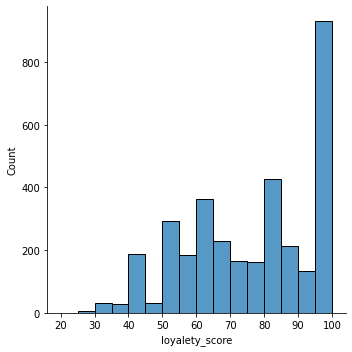

In [27]:
ax = sns.displot(loyalety_df.loyalety_score)

In [28]:
#распределение лояльных пользователей по бренду
brands_loyalety = loyalety_df.groupby('lovely_brand', as_index = False) \
    .agg({'loyalety_score' : 'mean', 'user_id' : 'count'})

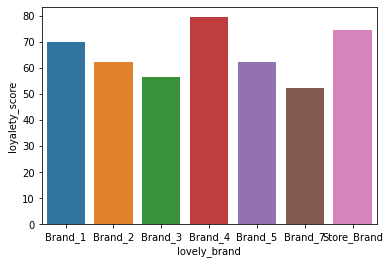

In [29]:
ax = sns.barplot(x = 'lovely_brand', y = 'loyalety_score', data = brands_loyalety)

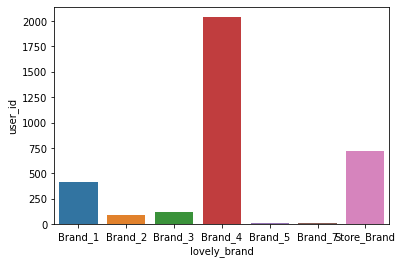

In [30]:
ax = sns.barplot(x = 'lovely_brand', y = 'user_id', data = brands_loyalety)